In [5]:
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict 
import matplotlib.pyplot as plt
%matplotlib inline
# Import packages for data cleaning
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import re # For finding specific strings in the text
# Import packages for data visualization
# import plotly.offline as py
# import plotly.graph_objects as go
import networkx as nx

In [7]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
sw = sw + ['coffee','coffees','cup','john', 'diruocco','jen','apodaca','ken','kevin','keurig','espresso','serve','capsule','device','serving','flavor','notes','mouthfeel','aroma','finish','brewed','brewing','parts','one','two','three','evaluate','evaluated','hint']

In [8]:
with open('coffee_words.pickle','rb') as read_file:
    coffee = pickle.load(read_file)
with open('coffee_ratings.pickle','rb') as read_file:
    ratings = pickle.load(read_file)

In [9]:
with open('df_topic_breakdown.pickle','rb') as read_file:
    df_topic_breakdown = pickle.load(read_file)

In [10]:
df_topic_breakdown.head()

,roaster,origin,roast_level,rating,length,word count,group,bright_floral_citrus,choc_woody_dark,tart_sweet_smooth,cacao_nut_clean,sweet_nut_pine,juicy_cacao_honey,red_berries,woody_nut_caramel,cherry_vinuous_choc
0,Jackrabbit Java,Costa Rica,Medium-Light,93,257,24,4,0.000000,0.045379,0.073064,0.000000,0.104257,0.000000,0.010795,0.000000,0.000000
1,Jackrabbit Java,"Nyamasheke District, Rwanda",Medium-Light,92,248,26,2,0.018180,0.000000,0.073098,0.063934,0.000000,0.009512,0.000000,0.006350,0.012827
2,Red Rooster Coffee Roaster,"Los Naranjos, La Argentina, Huila Department, ...",Light,96,365,32,2,0.017113,0.000000,0.077220,0.000000,0.027378,0.000000,0.007769,0.003145,0.022832
3,Paradise Roasters,"Huila, Colombia",Light,95,268,27,2,0.008159,0.000000,0.143630,0.006424,0.000000,0.000000,0.000000,0.000000,0.005296
4,Kakalove Cafe,"Antioquia Department, Colombia",Medium-Light,95,261,29,6,0.000000,0.037483,0.074243,0.009381,0.000000,0.000000,0.114548,0.000000,0.053789


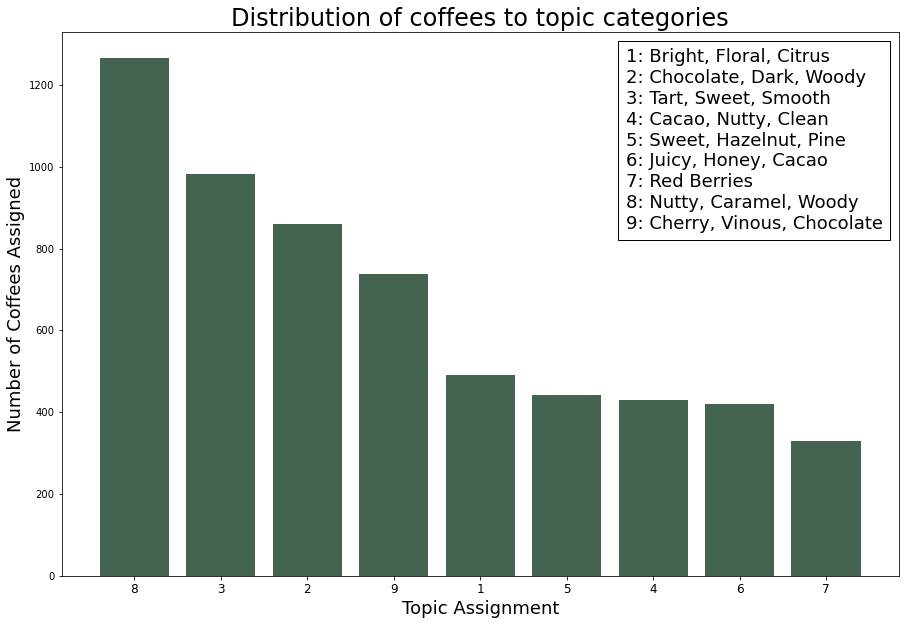

In [169]:
from matplotlib.offsetbox import AnchoredText
# set up figure and axes
f, ax = plt.subplots(1,1, figsize=(15,10))

# loc works the same as it does with figures (though best doesn't work)
# pad=5 will increase the size of padding between the border and text
# borderpad=5 will increase the distance between the border and the axes
# frameon=False will remove the box around the text
topics = ['Bright, Floral, Citrus', 'Chocolate, Dark, Woody', 'Tart, Sweet, Smooth','Cacao, Nutty, Clean', 'Sweet, Hazelnut, Pine', 'Juicy, Honey, Cacao', 'Red Berries','Nutty, Caramel, Woody', 'Cherry, Vinous, Chocolate']

textstr = '\n'.join(('1: '+topics[0],'2: '+topics[1],'3: '+topics[2],'4: '+topics[3],'5: ' +topics[4],'6: '+topics[5],'7: '+topics[6],'8: '+topics[7],'9: '+topics[8]))
anchored_text = AnchoredText(textstr,loc=1,prop=dict(fontsize="18"))
plt.xticks(range(len(values)), [8,3,2,9,1,5,4,6,7], fontsize='12')
plt.xlabel('Topic Assignment',fontsize='18')
plt.ylabel('Number of Coffees Assigned',fontsize='18')
plt.title('Distribution of coffees to topic categories',fontsize='24')
ax.bar(range(len(values)), values, align='center', color='#446351')
ax.add_artist(anchored_text)
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\Visuals\topic_distribution')
plt.show()

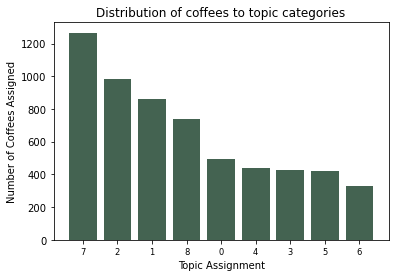

In [133]:
values = df_topic_breakdown.group.value_counts().values
plt.bar(range(len(values)), values, align='center', color='#446351')
plt.xticks(range(len(values)), [7,2,1,8,0,4,3,5,6], size='small')
plt.xlabel('Topic Assignment')
plt.ylabel('Number of Coffees Assigned')
plt.title('Distribution of coffees to topic categories')
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\Visuals\topic_distribution')
plt.show();

In [11]:
temporary = pd.DataFrame()
temporary['review'] = coffee.Review.str.lower()
temporary['group'] = df_topic_breakdown.group
temporary.head()

,review,group
0,"yeasty, richly sweet-savory. fresh-baked bread...",4
1,"balanced, sweet-toned, floral. tea rose, cocoa...",2
2,"delicate, deep; complex. pomegranate, macadami...",2
3,"very sweet, floral-toned. freesia, pink grapef...",2
4,"opulent, richly sweet-tart-savory. black curra...",6


## EDA on scores in categories

In [12]:
ratings.Aroma.isnull().sum()

51

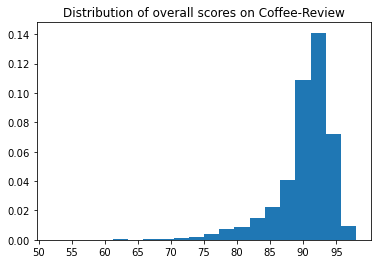

In [13]:
scores = ratings[ratings.Overall != 'NR'].Overall.astype(int)
plt.hist(sorted(scores), bins=20,density=True)
plt.xticks(np.arange(50,100,5))
plt.title('Distribution of overall scores on Coffee-Review')
plt.show();

Text(0.5, 1.0, 'Acidity')

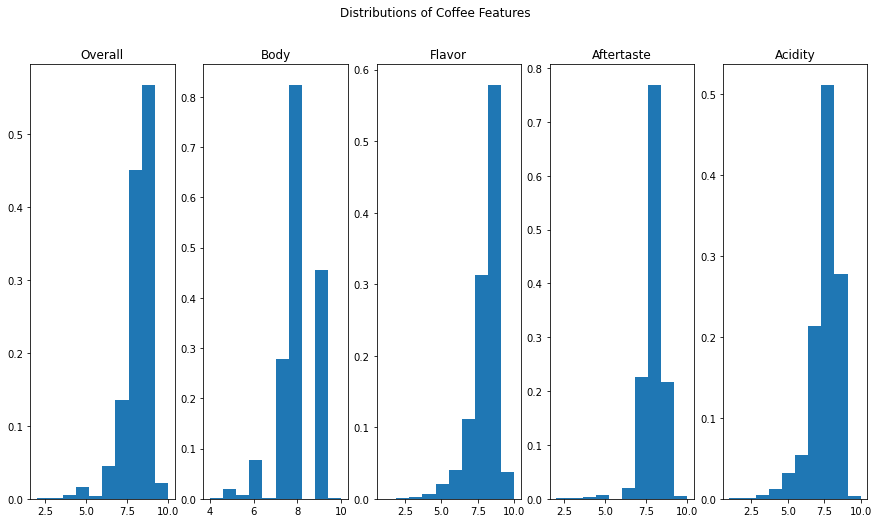

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(15,8))
fig.suptitle('Distributions of Coffee Features')

aroma = ratings[(ratings.Aroma != 'NR')&(ratings.Aroma != 'NA')&(ratings.Aroma.isnull() == False)].Aroma.astype(float)
axs[0].hist(sorted(aroma),density=True)
axs[0].set_title('Overall')
body = ratings[(ratings.Body != 'NR')&(ratings.Body != 'NA')&(ratings.Body.isnull() == False)].Body.astype(float)
axs[1].hist(sorted(body),density=True)
axs[1].set_title('Body')
flavor = ratings[(ratings.Flavor != 'NR')&(ratings.Flavor != 'NA')&(ratings.Flavor.isnull() == False)].Flavor.astype(float)
axs[2].hist(sorted(flavor),density=True)
axs[2].set_title('Flavor')
aftertaste = ratings[(ratings.Aftertaste != 'NR')&(ratings.Aftertaste != 'NA')&(ratings.Aftertaste.isnull() == False)].Aftertaste.astype(float)
axs[3].hist(sorted(aftertaste),density=True)
axs[3].set_title('Aftertaste')
acidity = ratings[(ratings.Acidity != 'NR')&(ratings.Acidity != 'NA')&(ratings.Acidity != 'na')&(ratings.Acidity != 'n/a')&(ratings.Acidity != 'Very Low')&(ratings.Acidity != 'Low')&(ratings.Acidity != 'Moderate')&(ratings.Acidity.isnull() == False)].Acidity.astype(float)
axs[4].hist(sorted(acidity),density=True)
axs[4].set_title('Acidity')
# for ax in fig.get_axes():
#     ax.label_outer()

In [79]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ejfel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [20]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

## Word Clouds

In [22]:
train = coffee

In [23]:
print(word_tokenize(coffee.Review[0]))

['Yeasty', ',', 'richly', 'sweet-savory', '.', 'Fresh-baked', 'bread', ',', 'cinnamon', ',', 'grape', 'candy', ',', 'baking', 'chocolate', ',', 'cedar', 'in', 'aroma', 'and', 'cup', '.', 'Sweet-savory', 'structure', 'with', 'very', 'full', ',', 'syrupy', 'mouthfeel', '.', 'The', 'finish', 'consolidates', 'to', 'cinnamon', 'and', 'baking', 'chocolate', ',', 'supported', 'by', 'fresh-cut', 'cedar', '.']


In [24]:
trial = coffee.Review[1]+coffee.Notes[1]+coffee.TLDR[1]
trial

'Balanced, sweet-toned, floral. Tea rose, cocoa nib, pear, almond, oak in aroma and cup. Sweet structure with balanced, poised acidity; satiny-smooth mouthfeel. The floral-toned finish that leads with notes of tea rose and almond with hints of pear.Produced at Mahembe Farm and processed at the Murundo Washing Station by the washed method (fruit skin and flesh are removed before drying). Jackrabbit Java selects the finest coffees from around the world and roasts them in Thermopolis, Wyoming’s mountain air. All Jackrabbit Java coffees are specialty-grade and roasted to order. Visit www.jackrabbitjava.com for more information.A friendly, classic Rwanda cup: balanced, deep, floral and nutty with fruit undertones.'

In [ ]:
# preprocess_textlemma(trial)

In [16]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
# wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# # Plot
# plot_cloud(wordcloud)

In [25]:
textblob_object = TextBlob(trial)
tb_words = textblob_object.words
print(tb_words)
Word(tb_words)

['Balanced', 'sweet-toned', 'floral', 'Tea', 'rose', 'cocoa', 'nib', 'pear', 'almond', 'oak', 'in', 'aroma', 'and', 'cup', 'Sweet', 'structure', 'with', 'balanced', 'poised', 'acidity', 'satiny-smooth', 'mouthfeel', 'The', 'floral-toned', 'finish', 'that', 'leads', 'with', 'notes', 'of', 'tea', 'rose', 'and', 'almond', 'with', 'hints', 'of', 'pear.Produced', 'at', 'Mahembe', 'Farm', 'and', 'processed', 'at', 'the', 'Murundo', 'Washing', 'Station', 'by', 'the', 'washed', 'method', 'fruit', 'skin', 'and', 'flesh', 'are', 'removed', 'before', 'drying', 'Jackrabbit', 'Java', 'selects', 'the', 'finest', 'coffees', 'from', 'around', 'the', 'world', 'and', 'roasts', 'them', 'in', 'Thermopolis', 'Wyoming', '’', 's', 'mountain', 'air', 'All', 'Jackrabbit', 'Java', 'coffees', 'are', 'specialty-grade', 'and', 'roasted', 'to', 'order', 'Visit', 'www.jackrabbitjava.com', 'for', 'more', 'information.A', 'friendly', 'classic', 'Rwanda', 'cup', 'balanced', 'deep', 'floral', 'and', 'nutty', 'with', 'fr

WordList(['Balanced', 'sweet-toned', 'floral', 'Tea', 'rose', 'cocoa', 'nib', 'pear', 'almond', 'oak', 'in', 'aroma', 'and', 'cup', 'Sweet', 'structure', 'with', 'balanced', 'poised', 'acidity', 'satiny-smooth', 'mouthfeel', 'The', 'floral-toned', 'finish', 'that', 'leads', 'with', 'notes', 'of', 'tea', 'rose', 'and', 'almond', 'with', 'hints', 'of', 'pear.Produced', 'at', 'Mahembe', 'Farm', 'and', 'processed', 'at', 'the', 'Murundo', 'Washing', 'Station', 'by', 'the', 'washed', 'method', 'fruit', 'skin', 'and', 'flesh', 'are', 'removed', 'before', 'drying', 'Jackrabbit', 'Java', 'selects', 'the', 'finest', 'coffees', 'from', 'around', 'the', 'world', 'and', 'roasts', 'them', 'in', 'Thermopolis', 'Wyoming', '’', 's', 'mountain', 'air', 'All', 'Jackrabbit', 'Java', 'coffees', 'are', 'specialty-grade', 'and', 'roasted', 'to', 'order', 'Visit', 'www.jackrabbitjava.com', 'for', 'more', 'information.A', 'friendly', 'classic', 'Rwanda', 'cup', 'balanced', 'deep', 'floral', 'and', 'nutty', 'w

In [ ]:
for noun_phrase in textblob_object.noun_phrases:
    print(noun_phrase.correct().lower())

In [26]:
reviews = ['','','','','','','','','']
for i in range(0,9):
    for row in temporary[(temporary.group == i )&(temporary.review != 'NA')].review.astype(str):
        reviews[i] += row + ' '

In [27]:
words = ['','','','','','','','','']
words[0]+'coffee'
df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].roast_level

60      Medium-Light
139     Medium-Light
210     Medium-Light
277            Light
293            Light
            ...     
5900     Medium-Dark
5910     Medium-Dark
5917          Medium
5943            Dark
5948          Medium
Name: roast_level, Length: 665, dtype: object

In [97]:
words = ['','','','','','','','','']
origins = ['','','','','','','','','']
roasts = ['','','','','','','','','']
for i in range(0,9):
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')&(df_topic_breakdown.roast_level != 'nan')].roast_level.astype(str):
        words[i] += row.lower() + ' '
        roasts[i] += row.lower() + ' '
    for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.origin != 'NA')&(df_topic_breakdown.origin != 'nan')&(df_topic_breakdown.origin.isnull() == False)].origin.astype(str):
        words[i] += row.lower() + ' '
        origins[i] += row.lower() + ' '

In [93]:
# for i in range(0,9):
#     for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.roast_level != 'NA')].roast_level.astype(str):
#         words[i] += row.lower() + ' '
#     for row in df_topic_breakdown[(df_topic_breakdown.group == i )&(df_topic_breakdown.origin != 'NA')&(df_topic_breakdown.origin != 'nan')&(df_topic_breakdown.origin.isnull() == False)].origin.astype(str):
#         words[i] += row.lower() + ' '

In [81]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 41
    s = 51
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [101]:
def topicWordCloud(data, title):
    wordcloud = WordCloud(
        background_color='#446351',
        stopwords=sw+['growing','region','zone','disclosed','department','province'],
        color_func=random_color_func,
        max_words=500,
        max_font_size=50, 
        scale=3,
        random_state=42    ).generate(str(data))

    fig = plt.figure(1)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(wspace=.1,hspace=.1)
    return wordcloud

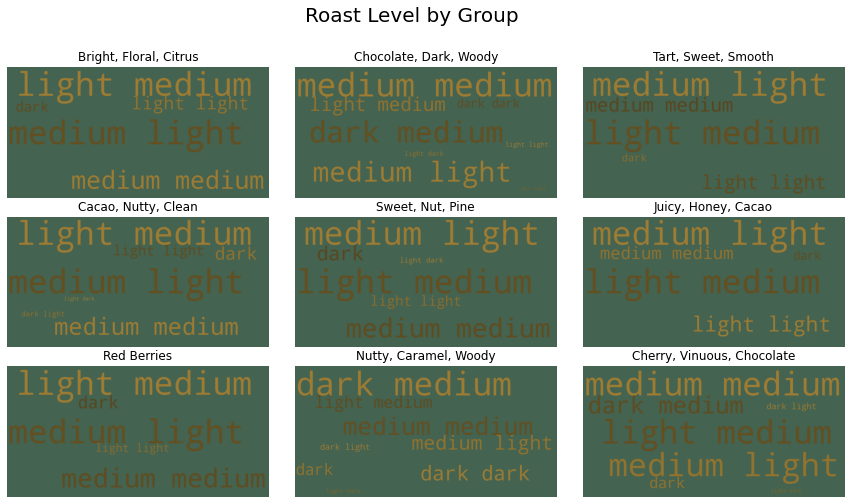

In [102]:
fig = plt.figure(figsize=(15,8))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(topics[i])
    wordcloud = topicWordCloud(roasts[i],'Roast Level by Group')

    ax.imshow(wordcloud)
    ax.axis('off')
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\roast_clouds')

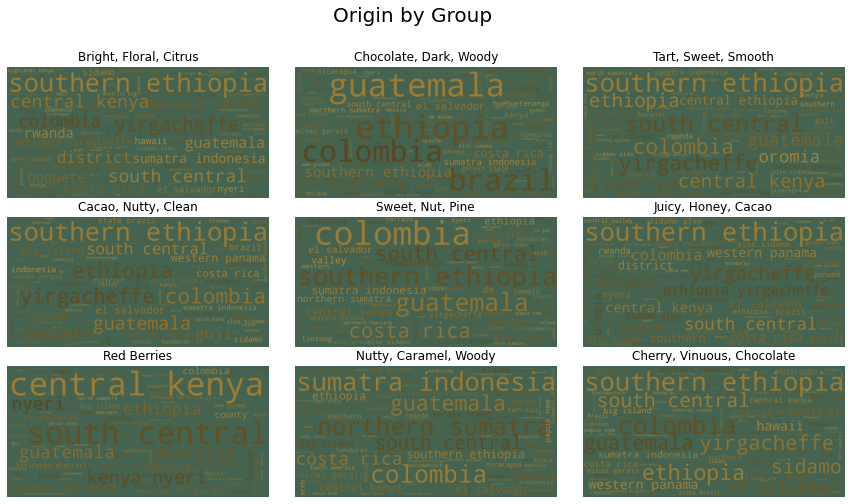

In [103]:
fig = plt.figure(figsize=(15,8))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(topics[i])
    wordcloud = topicWordCloud(origins[i],'Origin by Group')

    ax.imshow(wordcloud)
    ax.axis('off')
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\origin_clouds')

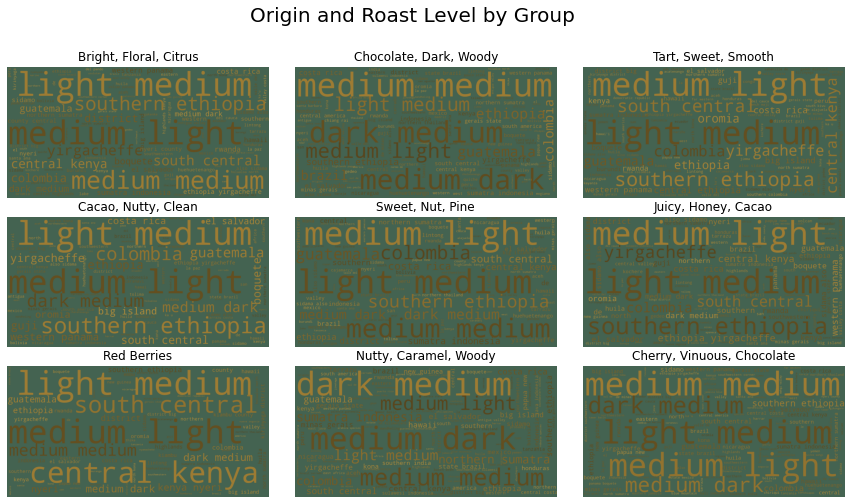

In [104]:
fig = plt.figure(figsize=(15,8))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(topics[i])
    wordcloud = topicWordCloud(words[i],'Origin and Roast Level by Group')

    ax.imshow(wordcloud)
    ax.axis('off')
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\origin_roast_clouds')

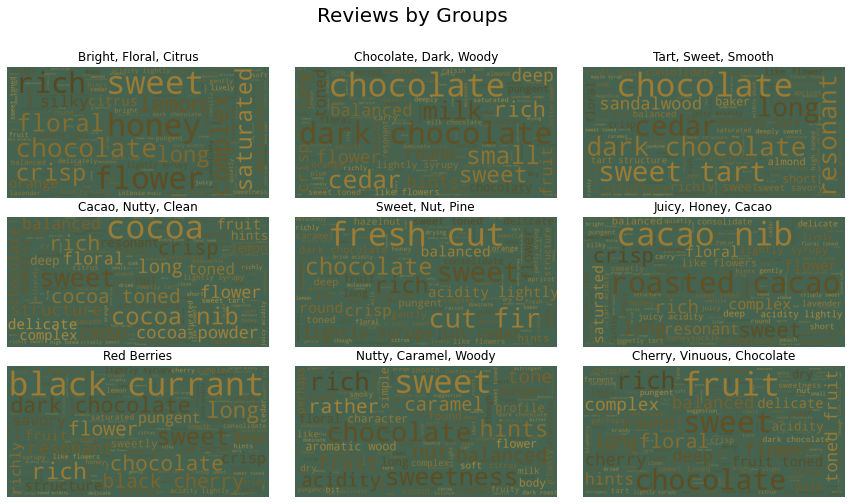

In [105]:
topics = ['Bright, Floral, Citrus', 'Chocolate, Dark, Woody', 'Tart, Sweet, Smooth','Cacao, Nutty, Clean', 'Sweet, Nut, Pine', 'Juicy, Honey, Cacao', 'Red Berries','Nutty, Caramel, Woody', 'Cherry, Vinuous, Chocolate']
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=.1)
# fig.tight_layout()
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(topics[i])
    wordcloud = topicWordCloud(reviews[i],'Reviews by Groups')

    ax.imshow(wordcloud)
    ax.axis('off')
plt.savefig(r'C:\Users\ejfel\Documents\metis_repos\Coffee-Reviews-NLP\word_clouds2')

In [52]:
df_topic_breakdown.shape

(5959, 16)